<a href="https://colab.research.google.com/github/Gowthampeter/Data-science/blob/main/Big_mart_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

To import all the data sets

In [131]:
bigmart = pd.read_csv("sample_submission_8RXa3c6.csv")

In [132]:
bigmart.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [133]:
train = pd.read_csv("train_v9rqX0R.csv")
test = pd.read_csv('test_AbJTz2l.csv')

In [134]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [135]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


To know about train details and the difference of the columns between train and test

In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [137]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [138]:
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

Adding the column source to train and test and concating both the datasets

In [139]:
train['source'] = 'train'
test['source'] = 'test'

In [140]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,train
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,train
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,train
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,train


In [141]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,test
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,test
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,test
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,test


In [142]:
New_dataset = pd.concat([train,test])

In [143]:
New_dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [144]:
New_dataset.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Our prediction is to predict the sales of each product at a particular outlet, so we are dropping the column 'Item_Outlet_Sales' since it was a predicted value and splitting the datasets into numerical and categorical column
            

---



In [145]:
Numerical_columns = New_dataset.select_dtypes(include = np.number).drop(columns = ["Item_Outlet_Sales","Outlet_Establishment_Year"]).columns

In [146]:
categorical_columns = New_dataset.select_dtypes(exclude = np.number).columns

In [147]:
Numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')

In [148]:
categorical_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')

To find the unique values in the data set in categorical columns


In [149]:
New_dataset[categorical_columns].apply(lambda x : x.unique())

Item_Identifier         [FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...
Item_Fat_Content                     [Low Fat, Regular, low fat, LF, reg]
Item_Type               [Dairy, Soft Drinks, Meat, Fruits and Vegetabl...
Outlet_Identifier       [OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...
Outlet_Size                                    [Medium, nan, High, Small]
Outlet_Location_Type                             [Tier 1, Tier 3, Tier 2]
Outlet_Type             [Supermarket Type1, Supermarket Type2, Grocery...
source                                                      [train, test]
dtype: object

In [150]:
New_dataset[categorical_columns].apply(lambda x : x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
source                     2
dtype: int64

In [151]:
New_dataset[categorical_columns].apply(lambda x : print(x.value_counts()))

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Med

Item_Identifier         None
Item_Fat_Content        None
Item_Type               None
Outlet_Identifier       None
Outlet_Size             None
Outlet_Location_Type    None
Outlet_Type             None
source                  None
dtype: object

In [152]:
New_dataset['Item_Identifier_2'] = New_dataset['Item_Identifier'].apply (lambda x:x[0:2])

In [153]:
New_dataset['Item_Identifier_2'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier_2, dtype: int64

In [154]:
New_dataset.groupby( ['Item_Identifier_2','Item_Type'])['Item_Identifier'].count()

Item_Identifier_2  Item_Type            
DR                 Dairy                     229
                   Hard Drinks               362
                   Soft Drinks               726
FD                 Baking Goods             1086
                   Breads                    416
                   Breakfast                 186
                   Canned                   1084
                   Dairy                     907
                   Frozen Foods             1426
                   Fruits and Vegetables    2013
                   Meat                      736
                   Seafood                    89
                   Snack Foods              1989
                   Starchy Foods             269
NC                 Health and Hygiene        858
                   Household                1548
                   Others                    280
Name: Item_Identifier, dtype: int64

In [155]:
New_dataset['Item_Fat_Content'] = New_dataset['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat', 'reg':'Regular'})

In [156]:
New_dataset['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

To check other collinearity

In [157]:
train.groupby(['Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Type        Outlet_Size
Grocery Store      Small           340.329723
Supermarket Type1  High           2298.995256
                   Medium         2348.354635
                   Small          2358.343066
Supermarket Type2  Medium         1995.498739
Supermarket Type3  Medium         3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [158]:
train.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [159]:
New_dataset[Numerical_columns]

,Item_Weight,Item_Visibility,Item_MRP
0,9.30,0.016047,249.8092
1,5.92,0.019278,48.2692
2,17.50,0.016760,141.6180
3,19.20,0.000000,182.0950
4,8.93,0.000000,53.8614
...,...,...,...
5676,10.50,0.013496,141.3154
5677,7.60,0.142991,169.1448
5678,10.00,0.073529,118.7440
5679,15.30,0.000000,214.6218


In [160]:
New_dataset[Numerical_columns].isna().sum()

Item_Weight        2439
Item_Visibility       0
Item_MRP              0
dtype: int64

In [161]:
New_dataset.groupby(['Item_Type'])['Item_Weight'].mean()

Item_Type
Baking Goods             12.275211
Breads                   11.152362
Breakfast                13.179112
Canned                   12.340830
Dairy                    13.238358
Frozen Foods             12.569323
Fruits and Vegetables    13.194406
Hard Drinks              11.576205
Health and Hygiene       13.171739
Household                13.337977
Meat                     12.766104
Others                   13.915724
Seafood                  12.760274
Snack Foods              12.865732
Soft Drinks              11.788408
Starchy Foods            13.659758
Name: Item_Weight, dtype: float64

In [162]:
New_dataset.groupby(['Item_Identifier_2'])['Item_Weight'].mean()

Item_Identifier_2
DR    12.116645
FD    12.735577
NC    13.344139
Name: Item_Weight, dtype: float64

In [163]:
New_dataset['Item_Weight']=New_dataset.groupby('Item_Type').Item_Weight.transform(lambda x: x.fillna(x.mean()))

In [164]:
New_dataset[Numerical_columns].isna().sum()

Item_Weight        0
Item_Visibility    0
Item_MRP           0
dtype: int64

<Axes: >

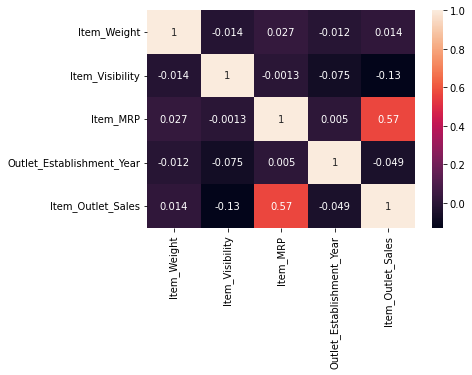

In [165]:
corr_= train.corr()
sns.heatmap(corr_,annot=True)

In [166]:
New_dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Identifier_2
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,FD
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,FD
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test,NC
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test,FD


In [167]:
New_dataset['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [168]:
New_dataset['Outlet Age'] = 2013 - New_dataset['Outlet_Establishment_Year']

In [169]:
New_dataset['Outlet Age'].value_counts()

28    2439
26    1553
14    1550
16    1550
9     1550
11    1548
4     1546
6     1543
15     925
Name: Outlet Age, dtype: int64

In [170]:
New_dataset.drop(columns = ['Outlet_Establishment_Year','Item_Identifier'],inplace = True)

In [171]:
train = New_dataset.loc[New_dataset['source']=='train']
test = New_dataset.loc[New_dataset['source']=='test']

In [172]:
train.drop(columns = 'source',inplace = True)
test.drop(columns = 'source',inplace = True)

<ipython-input-172-3df0c0df09d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns = 'source',inplace = True)
<ipython-input-172-3df0c0df09d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns = 'source',inplace = True)


In [173]:
x= train.select_dtypes(np.number).drop(columns= 'Item_Outlet_Sales')
vif_New_dataset = pd.DataFrame()
vif_New_dataset['features'] = x.columns
vif_New_dataset['VIF']= [variance_inflation_factor(x.values,i) for i in range (len(x.columns))]

In [174]:
vif_New_dataset

,features,VIF
0,Item_Weight,5.596111
1,Item_Visibility,2.467378
2,Item_MRP,4.627731
3,Outlet Age,3.663044


In [175]:
from sklearn.preprocessing import OneHotEncoder

In [176]:
enc = OneHotEncoder(handle_unknown='ignore')

In [177]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_2,Outlet Age
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,FD,15
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,NC,26
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,FD,26
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,NaN,Tier 2,Supermarket Type1,549.2850,FD,11
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,NC,9
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,FD,4


In [178]:
enc.fit(train[['Item_Identifier_2','Item_Type']])

OneHotEncoder(handle_unknown='ignore')

In [179]:
encoded_mat= enc.transform(train[['Item_Identifier_2','Item_Type']])

In [180]:
encoded_columns= enc.fit_transform(train[['Item_Identifier_2','Item_Type']])

In [181]:
enc.transform(test[['Item_Identifier_2','Item_Type']]).toarray()

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [182]:
New_dataset[['Item_Identifier_2','Item_Type']]

,Item_Identifier_2,Item_Type
0,FD,Dairy
1,DR,Soft Drinks
2,FD,Meat
3,FD,Fruits and Vegetables
4,NC,Household
...,...,...
5676,FD,Snack Foods
5677,FD,Starchy Foods
5678,NC,Health and Hygiene
5679,FD,Canned


In [183]:
Numerical_columns = New_dataset.select_dtypes(include = np.number).drop(columns = ['Item_Outlet_Sales'])
categorical_columns = New_dataset.select_dtypes(exclude = np.number)

In [184]:
categorical_columns

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Identifier_2
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train,FD
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train,DR
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train,FD
3,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,train,FD
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train,NC
...,...,...,...,...,...,...,...,...
5676,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,test,FD
5677,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2,test,FD
5678,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1,test,NC
5679,Regular,Canned,OUT017,NaN,Tier 2,Supermarket Type1,test,FD


In [185]:
New_dataset_categories_encoded = pd.get_dummies(categorical_columns)

In [186]:
New_dataset_categories_encoded

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,source_test,source_train,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5677,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
5678,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5679,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [187]:
New_dataset_final = pd.concat([Numerical_columns,New_dataset_categories_encoded ,New_dataset['source']],axis = 1)

In [188]:
New_dataset_final.to_excel('preprocessed_data.xlsx',index=False)

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [190]:
sample = pd.read_excel('preprocessed_data.xlsx')

In [191]:
sample.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,source_test,source_train,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC,source
0,9.30,0.016047,249.8092,14,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,train
1,5.92,0.019278,48.2692,4,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,train
2,17.50,0.016760,141.6180,14,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,train
3,19.20,0.000000,182.0950,15,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,train
4,8.93,0.000000,53.8614,26,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,train


In [192]:
sample_train = sample.loc[sample['source'] == 'train']
sample_test = sample.loc[sample['source'] == 'test']

In [203]:
del sample_train['source']
del sample_test['source']

In [204]:
sample_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,source_test,source_train,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC
0,9.300,0.016047,249.8092,14,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,5.920,0.019278,48.2692,4,0,1,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
2,17.500,0.016760,141.6180,14,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,19.200,0.000000,182.0950,15,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0
4,8.930,0.000000,53.8614,26,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,26,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
8519,8.380,0.046982,108.1570,11,0,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
8520,10.600,0.035186,85.1224,9,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
8521,7.210,0.145221,103.1332,4,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [205]:
sample_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,source_test,source_train,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC
8523,20.750000,0.007565,107.8622,14,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
8524,8.300000,0.038428,87.3198,6,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
8525,14.600000,0.099575,241.7538,15,1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
8526,7.315000,0.015388,155.0340,6,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
8527,13.238358,0.118599,234.2300,28,0,1,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.500000,0.013496,141.3154,16,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
14200,7.600000,0.142991,169.1448,4,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
14201,10.000000,0.073529,118.7440,11,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
14202,15.300000,0.000000,214.6218,6,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [196]:
train_model = pd.read_csv('train_v9rqX0R.csv')

In [197]:
target = train_model['Item_Outlet_Sales']

In [207]:
LR = LinearRegression()
LR.fit(sample_train,target)
predict_train = LR.predict(sample_train)

In [209]:
predict_test = LR.predict(sample_test)

In [218]:
predict_test

array([1836.08695754, 1522.07111811, 1882.38514932, ..., 1823.90903332,
       3588.89689368, 1285.8407461 ])

In [212]:
final_submission = pd.read_csv('sample_submission_8RXa3c6.csv')

In [213]:
final_submission['Item_Outlet_Sales'] = predict_test

In [214]:
final_submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1836.086958
1,FDW14,OUT017,1522.071118
2,NCN55,OUT010,1882.385149
3,FDQ58,OUT017,2579.910030
4,FDY38,OUT027,5129.023922
...,...,...,...
5676,FDB58,OUT046,2303.847427
5677,FDD47,OUT018,2454.148732
5678,NCO17,OUT045,1823.909033
5679,FDJ26,OUT017,3588.896894


In [216]:
print(r2_score(target,predict_train))

0.563772677537701


In [219]:
print(mean_squared_error(target,predict_train))

1270206.3939653977
